# Analyze categorical data
Only the results about the demographic question and the WorldCloud

In [1]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import dexplot as dxp
import tikzplotlib
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from PIL import Image
import numpy as np
import copy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import urllib
import requests
%matplotlib inline

In [2]:
Cleaned_Data = pd.read_csv('./Output/CleanedCategoricalData.csv')
Cleaned_Data.head()

,What is your age?,What is your gender?,What is your current educational level?,Are you or any of your family members scientist or health professional?,In what country are you currently in?,Are you interested in flu prevention?,Did you take the flu vaccine in the last 12 months?,"If you have children, did you vaccinate them or do you wish to vaccinate them?","What is, in your opinion, the best method we have to prevent flu spreading?",Is a vaccine necessary for a disease-free population?,How many times we have to typically take a flu shot?,Is the flu shot accessible to all people?,How does the flu spread?,Why is it important that you become immune from flu?,What is the incubation period?,"In order to prevent flu spreading, what should you do? (Check all that applies)",Condition
0,25.0,Female,High School,No,Italy,Yes,No,I do not have children,Stay home when we have flu,I do not know,I do not know,I do not know,Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control
1,26.0,Male,Bachelor degree,No,Italy,Maybe,No,I do not have children,"If sick, be responsible avoiding contact and/o...",Yes,Once per year,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,I do not know,Avoid close contact with people who are sick;S...,Control
2,30.0,Female,Bachelor degree,No,USA,Yes,No,I do not have children,"Vaccine, mask, stay home when sick",Yes,Once per year,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control
3,30.0,Male,High School,No,Italy,Yes,No,I do not have children,I think that every people should wash hands,Yes,Only when flu spread particularly fast,"Yes, all people can take a flu shot",Mainly person-to-person through respiratory dr...,Because I will not infect people around me (fr...,The time from the moment of exposure to an inf...,Stay home when you are sick;Cover your mouth a...,Experimental
4,24.0,Female,High School,No,UAE,Yes,No,No,Check body status out + igiene / vaccine if ne...,Yes,I do not know,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control


In [3]:
for s in Cleaned_Data.columns:
    Cleaned_Data.loc[Cleaned_Data[s] == 'Maybe', s] = 'No'
    Cleaned_Data.loc[Cleaned_Data[s] == 'I do not have children', s] = 'No'

for s in Cleaned_Data.columns:
    Cleaned_Data.loc[Cleaned_Data[s] == 'No', s] = 'Negative'
    Cleaned_Data.loc[Cleaned_Data[s] == 'Yes', s] = 'Affirmative'


Cleaned_Data.head()

,What is your age?,What is your gender?,What is your current educational level?,Are you or any of your family members scientist or health professional?,In what country are you currently in?,Are you interested in flu prevention?,Did you take the flu vaccine in the last 12 months?,"If you have children, did you vaccinate them or do you wish to vaccinate them?","What is, in your opinion, the best method we have to prevent flu spreading?",Is a vaccine necessary for a disease-free population?,How many times we have to typically take a flu shot?,Is the flu shot accessible to all people?,How does the flu spread?,Why is it important that you become immune from flu?,What is the incubation period?,"In order to prevent flu spreading, what should you do? (Check all that applies)",Condition
0,25,Female,High School,Negative,Italy,Affirmative,Negative,Negative,Stay home when we have flu,I do not know,I do not know,I do not know,Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control
1,26,Male,Bachelor degree,Negative,Italy,Negative,Negative,Negative,"If sick, be responsible avoiding contact and/o...",Affirmative,Once per year,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,I do not know,Avoid close contact with people who are sick;S...,Control
2,30,Female,Bachelor degree,Negative,USA,Affirmative,Negative,Negative,"Vaccine, mask, stay home when sick",Affirmative,Once per year,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control
3,30,Male,High School,Negative,Italy,Affirmative,Negative,Negative,I think that every people should wash hands,Affirmative,Only when flu spread particularly fast,"Yes, all people can take a flu shot",Mainly person-to-person through respiratory dr...,Because I will not infect people around me (fr...,The time from the moment of exposure to an inf...,Stay home when you are sick;Cover your mouth a...,Experimental
4,24,Female,High School,Negative,UAE,Affirmative,Negative,Negative,Check body status out + igiene / vaccine if ne...,Affirmative,I do not know,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control


In [4]:
'mean age and std'
print (Cleaned_Data[Cleaned_Data.columns[0]].mean(), Cleaned_Data[Cleaned_Data.columns[0]].std())

37.18181818181818 16.259573714391696


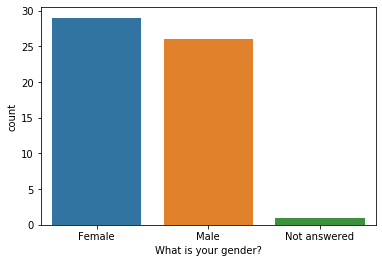

In [5]:
'gender'
sns.countplot(x=Cleaned_Data.columns[1], data=Cleaned_Data)
tikzplotlib.save("./Output/Plots/Gender.tex")

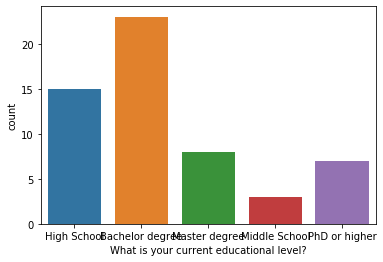

In [6]:
'educational level'
sns.countplot(x=Cleaned_Data.columns[2], data=Cleaned_Data)
tikzplotlib.save("./Output/Plots/Educational_level.tex")

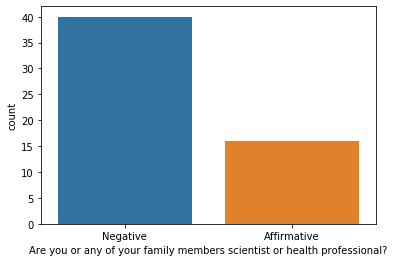

In [7]:
'Scientists health professional'
sns.countplot(x=Cleaned_Data.columns[3], data=Cleaned_Data)
tikzplotlib.save("./Output/Plots/Scientists_health_professional.tex")

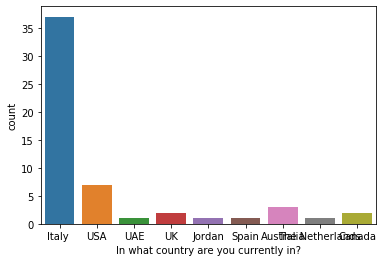

In [8]:
'Country currently in'
sns.countplot(x=Cleaned_Data.columns[4], data=Cleaned_Data)
tikzplotlib.save("./Output/Plots/Country.tex")

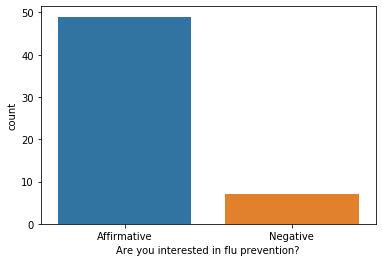

In [9]:
'Interest flu prevention'
sns.countplot(x=Cleaned_Data.columns[5], data=Cleaned_Data)
tikzplotlib.save("./Output/Plots/Interest_flu_prevetion.tex")

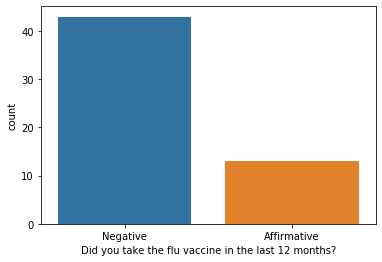

In [10]:
'Flu vaccine'
sns.countplot(x=Cleaned_Data.columns[6], data=Cleaned_Data)
tikzplotlib.save("./Output/Plots/Flu_vaccine.tex")

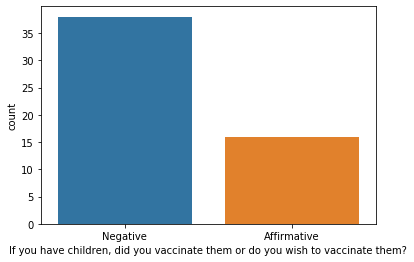

In [11]:
'Children, vaccine'
sns.countplot(x=Cleaned_Data.columns[7], data=Cleaned_Data)
tikzplotlib.save("./Output/Plots/Vaccine_Children.tex")

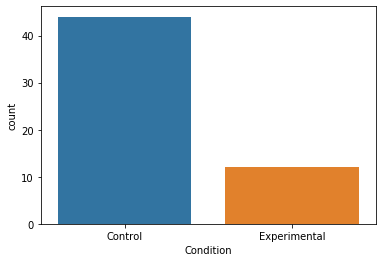

In [12]:
sns.countplot(x='Condition', data=Cleaned_Data)
tikzplotlib.save("./Output/Plots/Count_Control_Experimental.tex")

In [22]:
All_Text = " "
unwanted_words = ['if', 'and/or', 'we', 'have', 'when', 'i', 'be', 'think', 'that', '+', '/', 'it', 'is',
                  'not', 'possible','can', 'use', 'the', 'of', 'do', 'nan', 'at', '1', 'a', 'know',
                  'and', 'or', 'by', 'all', 'should', 'your', 'often', 'first',
                  'star', 'take', 'meter', 'with', 'as', 'through']
for t in Cleaned_Data['What is, in your opinion, the best method we have to prevent flu spreading?']:
    #print(t)
    All_Text += str(t) + " "

for char in '-.,\n)(/':
    All_Text=All_Text.replace(char,' ')
All_Text = All_Text.lower()

word_list = All_Text.split()

vaccine = ['vaccino', 'vacinazione', 'vaccines', 'vaccin', 'vacine', 'vaccination']
nose = ['nos']
distance = ['lontani']

for t in range(len(word_list)):
    if word_list[t] in vaccine:
        word_list[t] =  'vaccine'
    if word_list[t] in nose:
        word_list[t] =  'nose'
    if word_list[t] in distance:
        word_list[t] =  'distancing'

All_Text = " "
for t in word_list:
    if t not in unwanted_words:
        All_Text += str(t) + " "
        

word_list = All_Text.split()
Counter(word_list)

Counter({'stay': 6,
         'home': 6,
         'flu': 2,
         'sick': 4,
         'responsible': 1,
         'avoiding': 1,
         'contact': 3,
         'staying': 1,
         'vaccine': 24,
         'mask': 1,
         'every': 1,
         'people': 3,
         'wash': 3,
         'hands': 4,
         'check': 1,
         'body': 1,
         'status': 1,
         'out': 1,
         'igiene': 1,
         'necessary': 1,
         'distancing': 2,
         'healthy': 2,
         'food': 1,
         'good': 1,
         'life': 2,
         'alone': 1,
         'isolation': 2,
         'standard': 1,
         'prevention': 1,
         'measures': 1,
         'exluded': 1,
         'distance': 2,
         'personal': 1,
         'hygiene': 3,
         'cleanliness': 2,
         'rest': 2,
         'research': 2,
         'increase': 1,
         'medicinal': 1,
         'development': 1,
         'self': 2,
         'protection': 1,
         'care': 1,
         'physical': 2,
       

### A new worldcould is automatically generate everytime

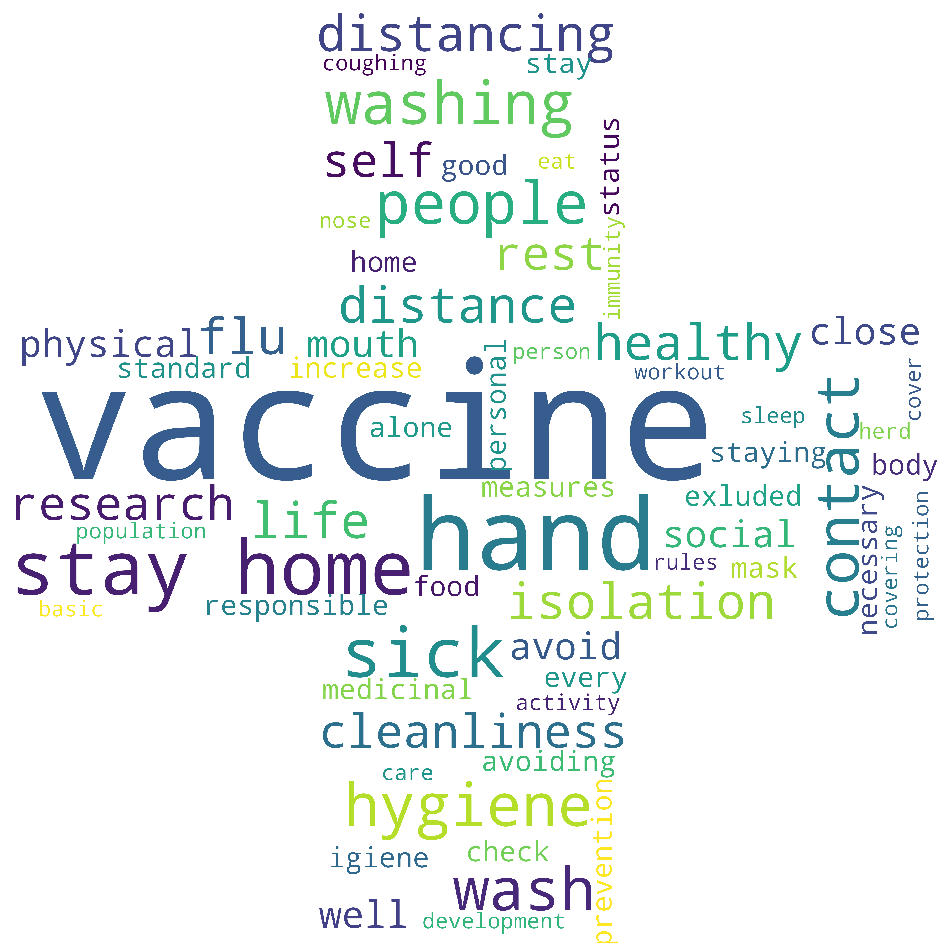

In [23]:
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/9/0/e/9/11954371911716261963red_cross_joshua_dwire_02.svg.med.png', stream=True).raw))
word_cloud = WordCloud(width = 512, height = 512, scale = 15,background_color="rgba(255, 255, 255, 0)", mode="RGBA", stopwords=STOPWORDS, mask=mask).generate(All_Text)
plt.figure(figsize=(13,13))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("./Output/Plots/WordCloud.png")